In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [163]:
df = pd.read_excel('FF_OzON_Summary.xlsx')
df

,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,13.981717,508.580048,736.7 -> 547.5,736.7,547.5,0
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,13.626433,502.100037,736.7 -> 547.5,736.7,547.5,0
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,13.670867,573.440063,736.7 -> 547.5,736.7,547.5,0
3,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_cereb_O3on_01,n-10,13.672033,1120.760132,722.7 -> 547.5,722.7,547.5,-1
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,14.114917,584.980042,736.7 -> 547.5,736.7,547.5,0
...,...,...,...,...,...,...,...,...,...
456,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,16.041483,618.880066,844.7 -> 655.5,844.7,655.5,-1
457,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,16.041500,641.640076,844.7 -> 655.5,844.7,655.5,-1
458,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,15.509183,1293.440063,842.7 -> 653.5,842.7,653.5,-1
459,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,15.553600,1196.560059,842.7 -> 653.5,842.7,653.5,-1


Add Liver Brain label

In [164]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)

df

,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label,Biology
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,13.981717,508.580048,736.7 -> 547.5,736.7,547.5,0,dienc
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,13.626433,502.100037,736.7 -> 547.5,736.7,547.5,0,cereb
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,13.670867,573.440063,736.7 -> 547.5,736.7,547.5,0,hippo
3,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_cereb_O3on_01,n-10,13.672033,1120.760132,722.7 -> 547.5,722.7,547.5,-1,cereb
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,14.114917,584.980042,736.7 -> 547.5,736.7,547.5,0,dienc
...,...,...,...,...,...,...,...,...,...,...
456,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,16.041483,618.880066,844.7 -> 655.5,844.7,655.5,-1,liver
457,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,16.041500,641.640076,844.7 -> 655.5,844.7,655.5,-1,liver
458,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,15.509183,1293.440063,842.7 -> 653.5,842.7,653.5,-1,liver
459,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,15.553600,1196.560059,842.7 -> 653.5,842.7,653.5,-1,liver


Make liver df and brain df

In [165]:
# Filter for 'liver' in Biology
liver_df = df[df['Biology'] == 'liver']
# Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
brain_df = pd.concat([
    df[df['Biology'] == 'cortex'],
    df[df['Biology'] == 'cereb'],
    df[df['Biology'] == 'hippo'],
    df[df['Biology'] == 'dienc']
])
brain_df

,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label,Biology
6,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,13.582050,1114.060059,736.7 -> 547.5,736.7,547.5,0,cortex
10,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,13.804067,967.260071,736.7 -> 547.5,736.7,547.5,0,cortex
14,[TG(50:3)]_FA18:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-9,13.582017,1122.320068,736.7 -> 547.5,736.7,547.5,0,cortex
17,[TG(50:3)]_FA18:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-9,13.582050,851.400085,736.7 -> 547.5,736.7,547.5,0,cortex
21,[TG(50:3)]_FA18:1,11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,13.626417,4646.960449,736.7 -> 547.5,736.7,547.5,0,cortex
...,...,...,...,...,...,...,...,...,...,...
352,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD185_M3_5xFAD_dienc_O3on_01,n-9,16.898183,7040.260742,794.7 -> 605.5,794.7,605.5,0,dienc
356,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD189_M1_5xFAD_dienc_O3on_01,n-9,17.164617,1402.160156,794.7 -> 605.5,794.7,605.5,0,dienc
361,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD189_M2_5xFAD_dienc_O3on_01,n-9,16.853767,2831.120117,794.7 -> 605.5,794.7,605.5,0,dienc
399,"[TG(56:7),TG(55:0)]_FA18:1",11282023_FAD189_M3_WT_dienc_O3on_01,n-9,13.162683,656.980042,812.8 -> 623.6,812.8,623.6,0,dienc


In [174]:
# Group by Lipid and db_pos
liver_df['Lipid_DB_group'] = liver_df.groupby(['Lipid', 'Sample_ID']).ngroup()
brain_df['Lipid_DB_group'] = brain_df.groupby(['Lipid', 'Sample_ID']).ngroup()
df['Lipid_Sample_group'] = df.groupby(['Lipid', 'Sample_ID']).ngroup()
df.to_csv('df_OzESI_labels.csv')
liver_df
brain_df
df



/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label,Biology,Lipid_Sample_group
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,13.981717,508.580048,736.7 -> 547.5,736.7,547.5,0,dienc,0
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,13.626433,502.100037,736.7 -> 547.5,736.7,547.5,0,cereb,1
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,13.670867,573.440063,736.7 -> 547.5,736.7,547.5,0,hippo,2
3,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_cereb_O3on_01,n-10,13.672033,1120.760132,722.7 -> 547.5,722.7,547.5,-1,cereb,3
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,14.114917,584.980042,736.7 -> 547.5,736.7,547.5,0,dienc,4
...,...,...,...,...,...,...,...,...,...,...,...
456,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,16.041483,618.880066,844.7 -> 655.5,844.7,655.5,-1,liver,321
457,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,16.041500,641.640076,844.7 -> 655.5,844.7,655.5,-1,liver,322
458,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,15.509183,1293.440063,842.7 -> 653.5,842.7,653.5,-1,liver,323
459,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,15.553600,1196.560059,842.7 -> 653.5,842.7,653.5,-1,liver,324


Make Pivot Table

In [180]:
grouped_df = df.groupby(['Lipid', 'Sample_ID','db_pos'])['OzESI_Intensity'].sum().reset_index()


# Calculating the total intensity for each db_pos of every Lipid and Sample_ID combination
grouped_df['Total_DB_Intensity'] = grouped_df.groupby(['Lipid', 'Sample_ID'])['OzESI_Intensity'].transform('sum')

# Calculating the 'n-9%' for each row where db_pos is 'n-9'
grouped_df['n-9%'] = None  # Initializing the column with None values
n9_rows = grouped_df['db_pos'] == 'n-9'  # Identifying rows where db_pos is 'n-9'

# Calculating n-9% for the identified rows
grouped_df.loc[n9_rows, 'n-9%'] = (grouped_df.loc[n9_rows, 'OzESI_Intensity'] / grouped_df.loc[n9_rows, 'Total_DB_Intensity']) * 100

# Display the first few rows of the updated dataframe
grouped_df.head(50)

n9_df = grouped_df.copy()
n9_df = n9_df.dropna(subset=['n-9%'])

n9_df.head(50)



# # Calculating the relative percentage of OzESI_Intensity for each Sample_ID within each Lipid
# grouped_df['Relative_Percentage'] = (grouped_df['OzESI_Intensity'] / grouped_df['Total_Intensity']) * 100

# # Pivoting for plotting
# pivot_table = grouped_df.pivot(index='Lipid', columns='Sample_ID', values='Relative_Percentage')
# pivot_table

,Lipid,Sample_ID,db_pos,OzESI_Intensity,Total_DB_Intensity,n-9%
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,508.580048,508.580048,100.000000
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,502.100037,502.100037,100.000000
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,573.440063,573.440063,100.000000
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,584.980042,584.980042,100.000000
5,[TG(50:3)]_FA18:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,659.140076,659.140076,100.000000
6,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,1114.060059,1114.060059,100.000000
8,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_dienc_O3on_01,n-9,542.420044,1329.980103,40.784072
9,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cereb_O3on_01,n-9,548.920044,548.920044,100.000000
10,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,967.260071,967.260071,100.000000
11,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,692.440063,692.440063,100.000000


Brain plot summed intensity % for each TG in brain

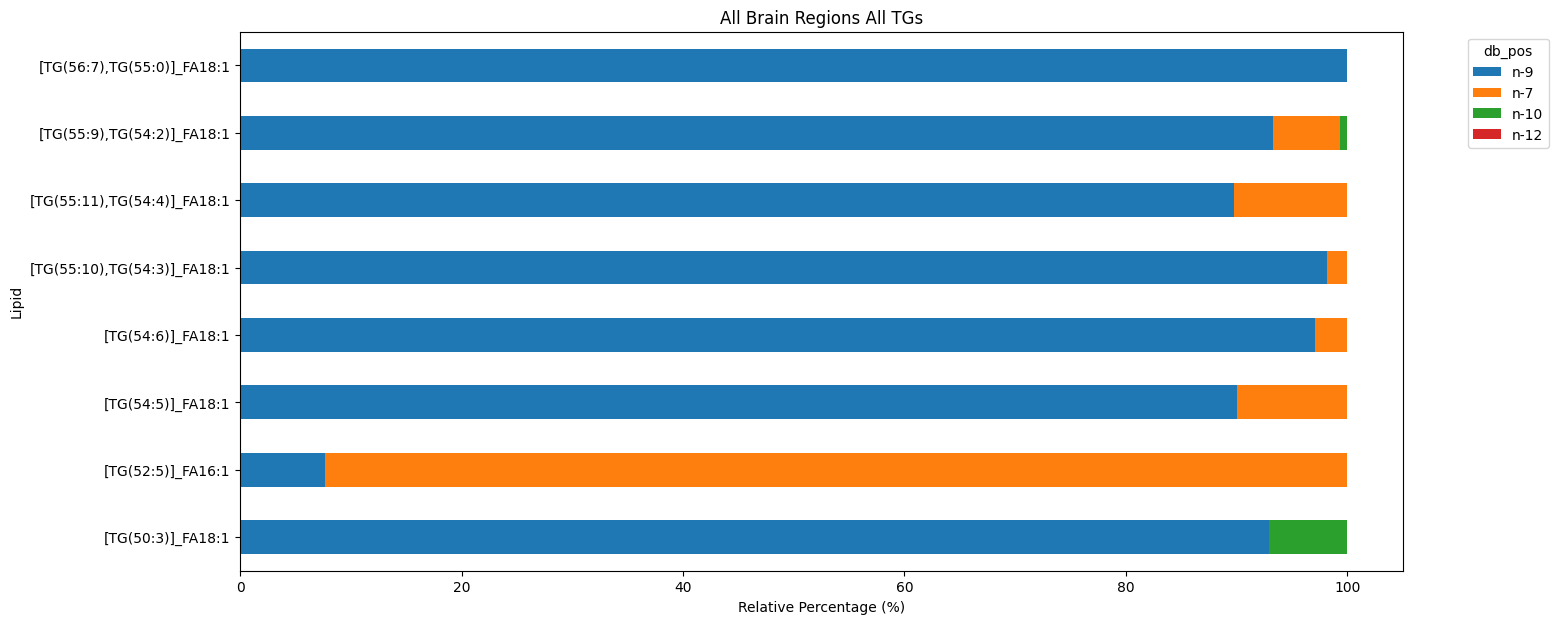

In [71]:
# Group by Lipid and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Creating a horizontal bar plot
pivot_table_brain.plot(kind='barh', stacked=True, figsize=(15, 7))
plt.xlabel('Relative Percentage (%)')
plt.title('All Brain Regions All TGs')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the plot as a PNG file
file_name = f"Brain_AllRegions_TGs.png"
plt.savefig(file_name, bbox_inches='tight')
plt.show()


summed relative intensity for each TG in liver

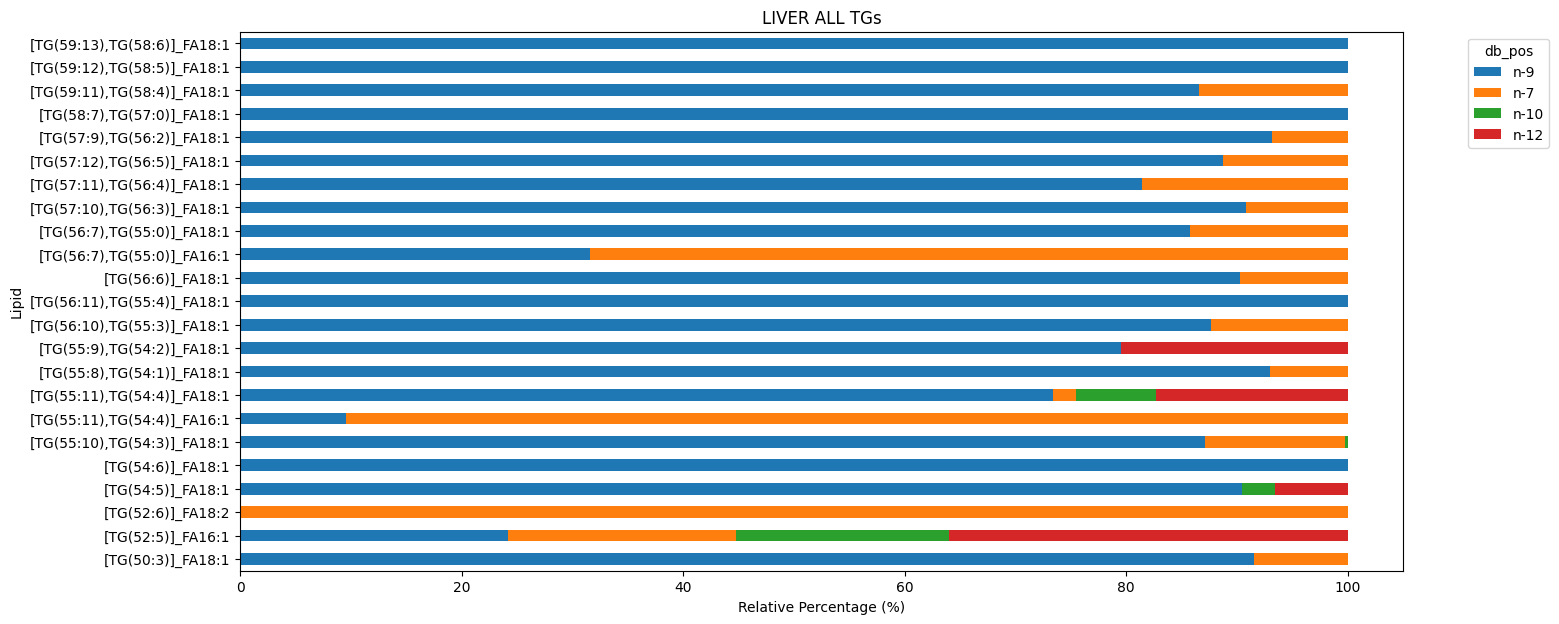

In [72]:
# Adjusting the code to ensure all 'db_pos' categories are present after pivoting

# First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
grouped = liver_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped['Total_Intensity'] = grouped.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table = grouped.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')

# Ensuring that all db_pos categories are present
all_db_pos = ['n-9', 'n-7', 'n-10', 'n-12']
pivot_table = pivot_table.reindex(all_db_pos, axis=1, fill_value=0)

# Ordering the db_pos categories as desired
pivot_table = pivot_table[all_db_pos]

# Plotting all together with the desired order of db_pos
pivot_table.plot(kind='barh', stacked=True, figsize=(15, 7))
plt.ylabel('Lipid')
plt.xlabel('Relative Percentage (%)')
plt.title('LIVER ALL TGs')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
# Saving the plot as a PNG file
file_name = f"Liver_TGs.png"
plt.savefig(file_name, bbox_inches='tight')
plt.show()


Brain regions seperately

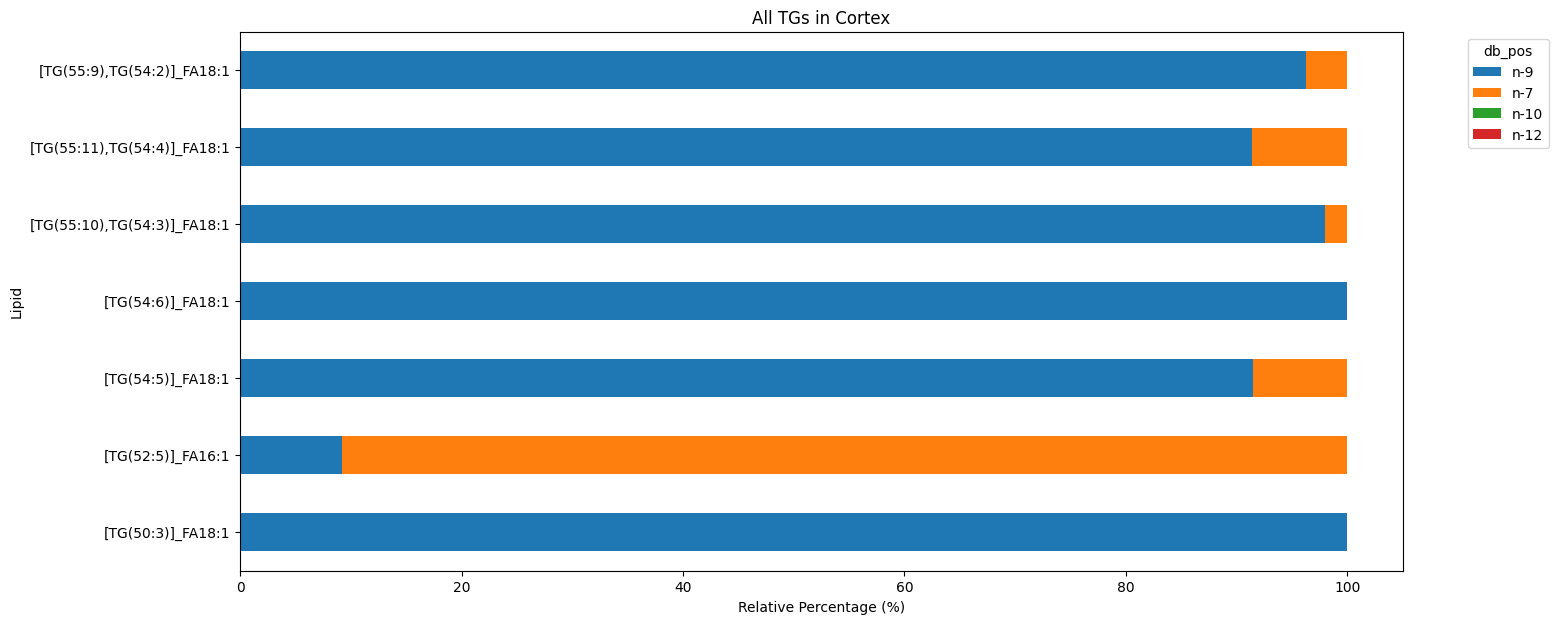

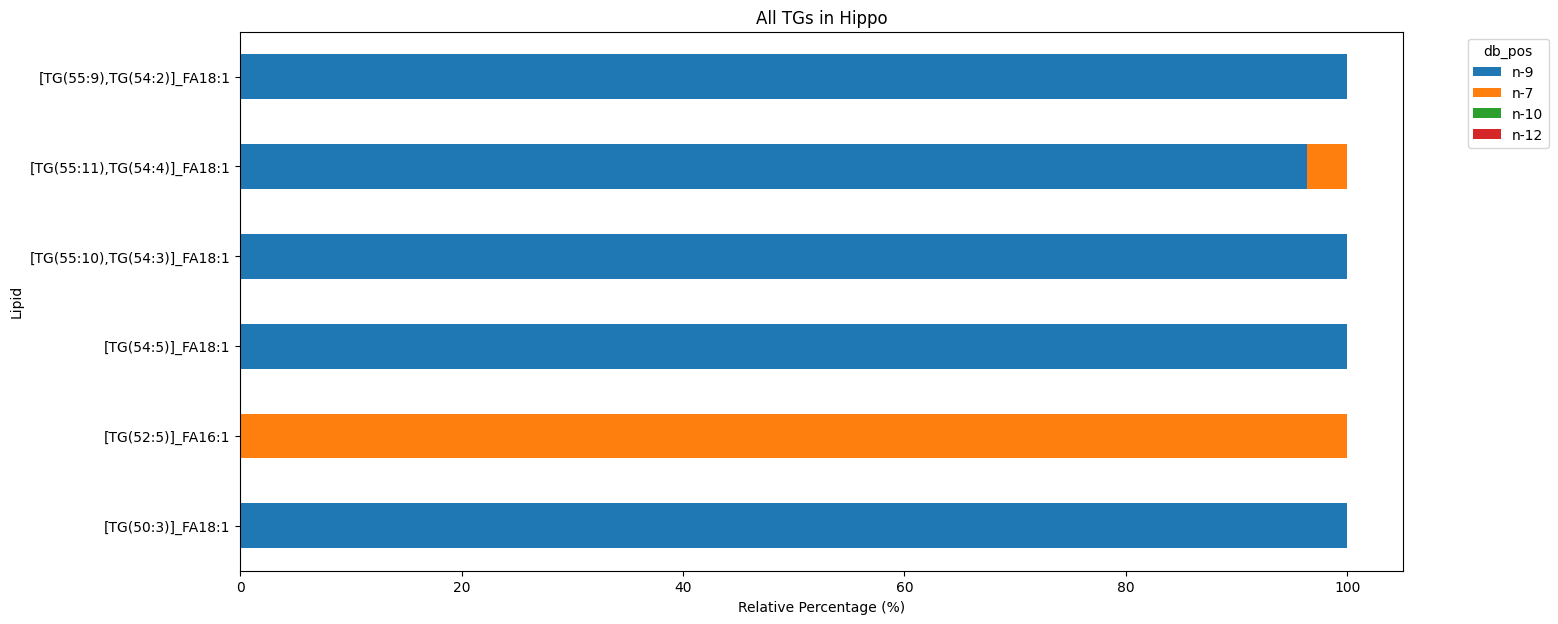

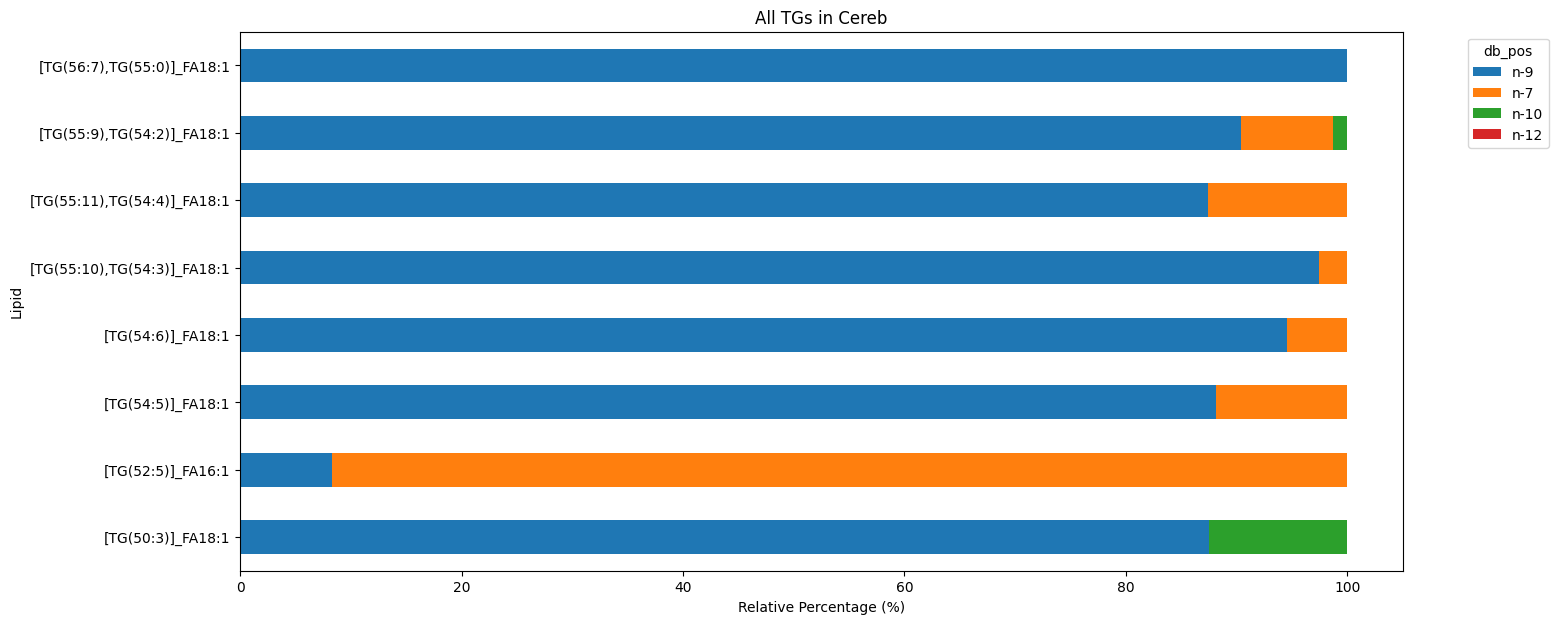

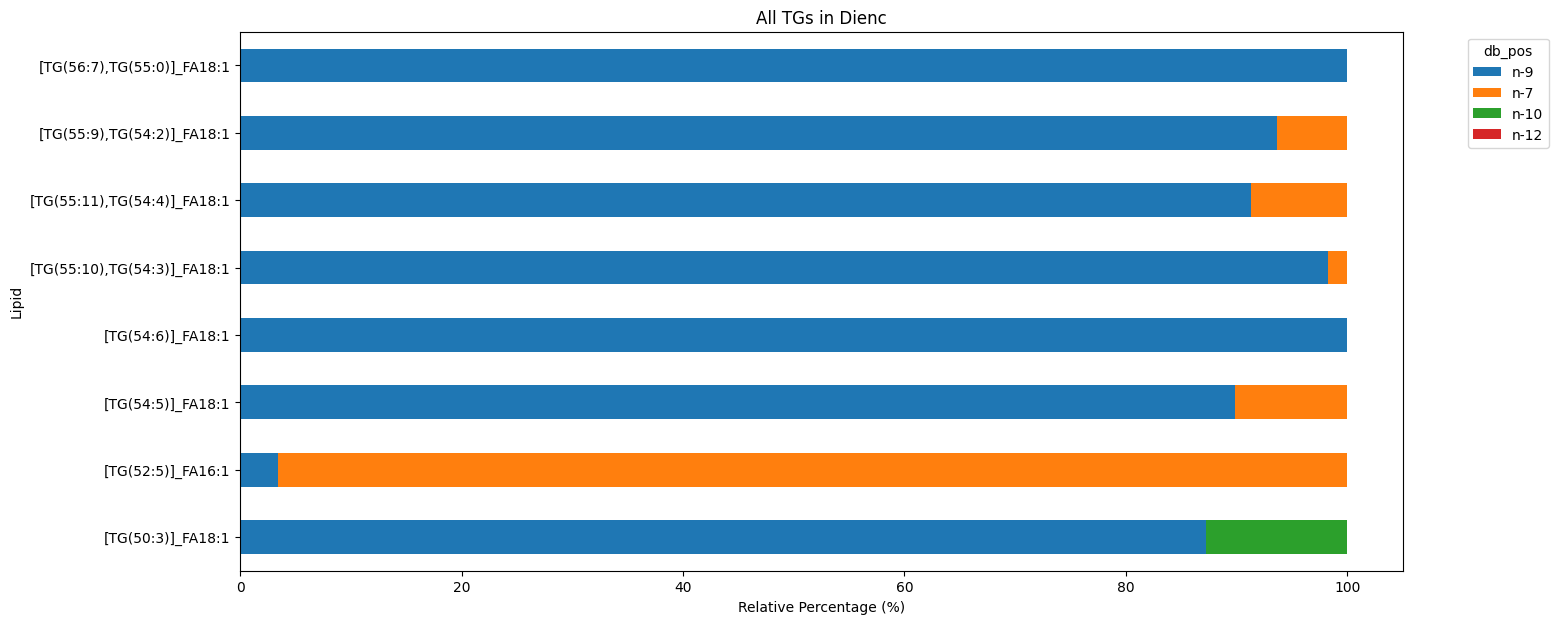

In [78]:
# Assuming 'brain_df' is already defined and contains the necessary data
# Creating separate horizontal bar plots for each brain region: cortex, hippo, cereb, dienc

for region in ['cortex', 'hippo', 'cereb', 'dienc']:
    # Filter data for the current region
    region_df = brain_df[brain_df['Biology'] == region]

    # Group by Lipid and db_pos, summing OzESI_Intensity
    grouped_region = region_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid
    grouped_region['Total_Intensity'] = grouped_region.groupby('Lipid')['OzESI_Intensity'].transform('sum')

    # Calculating the relative percentage of each db_pos
    grouped_region['Relative_Percentage'] = (grouped_region['OzESI_Intensity'] / grouped_region['Total_Intensity']) * 100

    # Pivoting for plotting
    pivot_table_region = grouped_region.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
    pivot_table_region = pivot_table_region.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

    # Creating a horizontal bar plot for the current brain region
    pivot_table_region.plot(kind='barh', stacked=True, figsize=(15, 7))
    plt.xlabel('Relative Percentage (%)')
    plt.title(f'All TGs in {region.capitalize()}')
    plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Saving the plot as a PNG file
    file_name = f"{region.capitalize()}.png"
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()


ABOVE LOOKS GOOD

HEATMAP HEATMAP

In [144]:
# Extracting the brain region from the 'Sample_ID' column
brain_df['Brain_Region'] = brain_df['Sample_ID'].str.extract(r'(\w+)_O3on')

# Grouping by Lipid, Brain Region, and db_pos, and summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'Brain_Region', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid-Brain Region combination
grouped_brain['Total_Intensity'] = grouped_brain.groupby(['Lipid', 'Brain_Region'])['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos within each Lipid-Brain Region combination
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table_brain = grouped_brain.pivot_table(
    index='Lipid', 
    columns=['Brain_Region', 'db_pos'], 
    values='Relative_Percentage'
)

# Reset index to flatten the multi-level columns
pivot_table_brain.columns = ['_'.join(col).strip() for col in pivot_table_brain.columns.values]
pivot_table_brain.reset_index(inplace=True)


# Removing the initial numbering (date-like numbers) from each column name
pivot_table_brain.columns = ['_'.join(col.split('_')[1:]) for col in pivot_table_brain.columns]

# Display the first few rows of the pivot table after removing the numbering
pivot_table_brain.head()


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,,DOD94_F3_WT_cereb_n-7,DOD94_F3_WT_cereb_n-9,DOD94_F3_WT_cortex_n-7,DOD94_F3_WT_cortex_n-9,DOD94_F3_WT_dienc_n-7,DOD94_F3_WT_dienc_n-9,DOD94_F3_WT_hippo_n-9,FAD184_F3_WT_cereb_n-7,FAD184_F3_WT_cereb_n-9,...,FAD189_M1_5xFAD_dienc_n-9,FAD189_M1_5xFAD_hippo_n-7,FAD189_M1_5xFAD_hippo_n-9,FAD189_M2_5xFAD_cereb_n-7,FAD189_M2_5xFAD_cereb_n-9,FAD189_M2_5xFAD_cortex_n-7,FAD189_M2_5xFAD_cortex_n-9,FAD189_M2_5xFAD_dienc_n-7,FAD189_M2_5xFAD_dienc_n-9,FAD189_M2_5xFAD_hippo_n-9
0,[TG(50:3)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,...,100.000000,NaN,100.0,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN
1,[TG(52:5)]_FA16:1,100.0,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,87.722276,12.277724,83.947685,16.052315,91.696800,8.303200,NaN
2,[TG(54:5)]_FA18:1,NaN,100.0,NaN,100.0,NaN,100.0,NaN,NaN,100.0,...,87.082549,NaN,100.0,11.601481,88.398519,9.074981,90.925019,11.355172,88.644828,100.0
3,[TG(54:6)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN
4,"[TG(55:10),TG(54:3)]_FA18:1",NaN,100.0,NaN,100.0,NaN,100.0,100.0,NaN,100.0,...,100.000000,NaN,100.0,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN


In [153]:
# First, we will replicate the process as done previously for the brain data
# Extracting the brain region from the 'Sample_ID' column
brain_df['Brain_Region'] = brain_df['Sample_ID'].str.extract(r'(\w+)_O3on')

# Preparing the pivot table for liver and brain data
pivot_table_liver_brain = pivot_table_brain.copy()

# Looping through the specified brain regions to create and append pivot tables
for region in ['cortex', 'hippo', 'cereb', 'dienc']:
    # Filter data for the current region
    region_df = brain_df[brain_df['Biology'] == region]

    # Group by Lipid and db_pos, summing OzESI_Intensity
    grouped_region = region_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid
    grouped_region['Total_Intensity'] = grouped_region.groupby('Lipid')['OzESI_Intensity'].transform('sum')

    # Calculating the relative percentage of each db_pos
    grouped_region['Relative_Percentage'] = (grouped_region['OzESI_Intensity'] / grouped_region['Total_Intensity']) * 100

    # Pivoting for plotting
    pivot_table_region = grouped_region.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
    pivot_table_region = pivot_table_region.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

    # Renaming the columns to include Sample_ID and db_pos
    pivot_table_region.columns = [region + '_' + col for col in pivot_table_region.columns]

    # Append pivot_table_region to pivot_table_liver_brain
    pivot_table_liver_brain = pd.concat([pivot_table_liver_brain, pivot_table_region], axis=1)

# Resetting index for the pivot table
pivot_table_liver_brain.reset_index(inplace=True, drop=True)

# Display the first few rows of the updated pivot table
pivot_table_liver_brain.head()

# # Filtering the pivot table to only keep columns with 'n-9' values
# pivot_table_liver_brain_n9 = pivot_table_liver_brain.filter(like='n-9')

# # Display the first few rows of the updated pivot table with only 'n-9' columns
# pivot_table_liver_brain_n9.head()



/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,,DOD94_F3_WT_cereb_n-7,DOD94_F3_WT_cereb_n-9,DOD94_F3_WT_cortex_n-7,DOD94_F3_WT_cortex_n-9,DOD94_F3_WT_dienc_n-7,DOD94_F3_WT_dienc_n-9,DOD94_F3_WT_hippo_n-9,FAD184_F3_WT_cereb_n-7,FAD184_F3_WT_cereb_n-9,...,hippo_n-10,hippo_n-12,cereb_n-9,cereb_n-7,cereb_n-10,cereb_n-12,dienc_n-9,dienc_n-7,dienc_n-10,dienc_n-12
0,[TG(50:3)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[TG(52:5)]_FA16:1,100.0,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[TG(54:5)]_FA18:1,NaN,100.0,NaN,100.0,NaN,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[TG(54:6)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[TG(55:10),TG(54:3)]_FA18:1",NaN,100.0,NaN,100.0,NaN,100.0,100.0,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


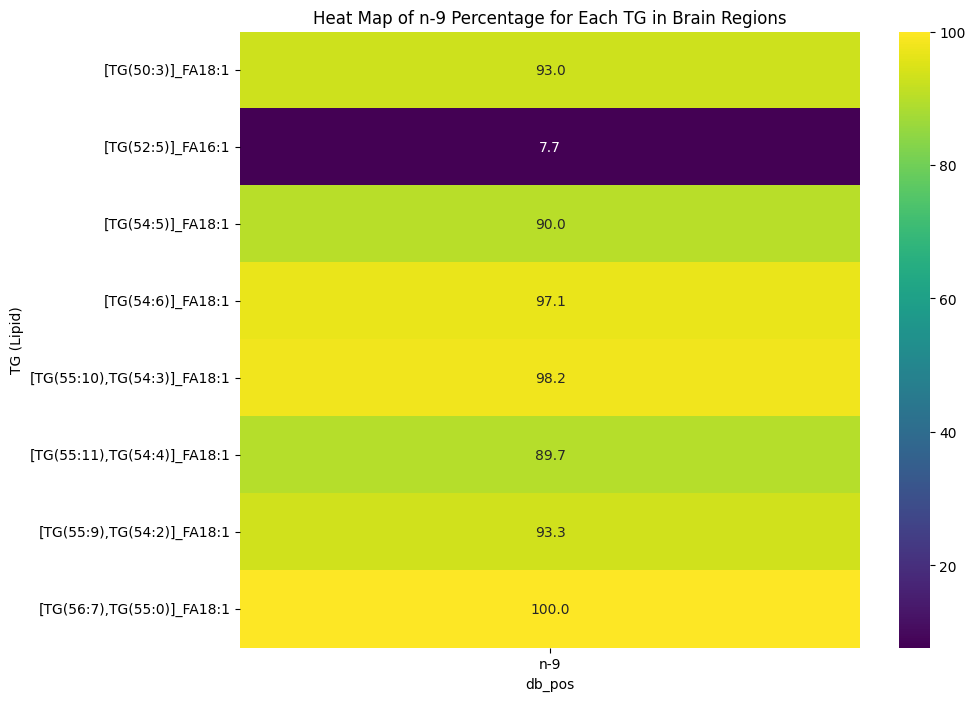

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped_brain' is already defined and contains the necessary data
# Filtering data for 'n-9' db_pos
n9_data = grouped_brain[grouped_brain['db_pos'] == 'n-9']

# Pivoting for the heat map
pivot_n9 = n9_data.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')

# Creating the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_n9, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG in Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('db_pos')
plt.show()


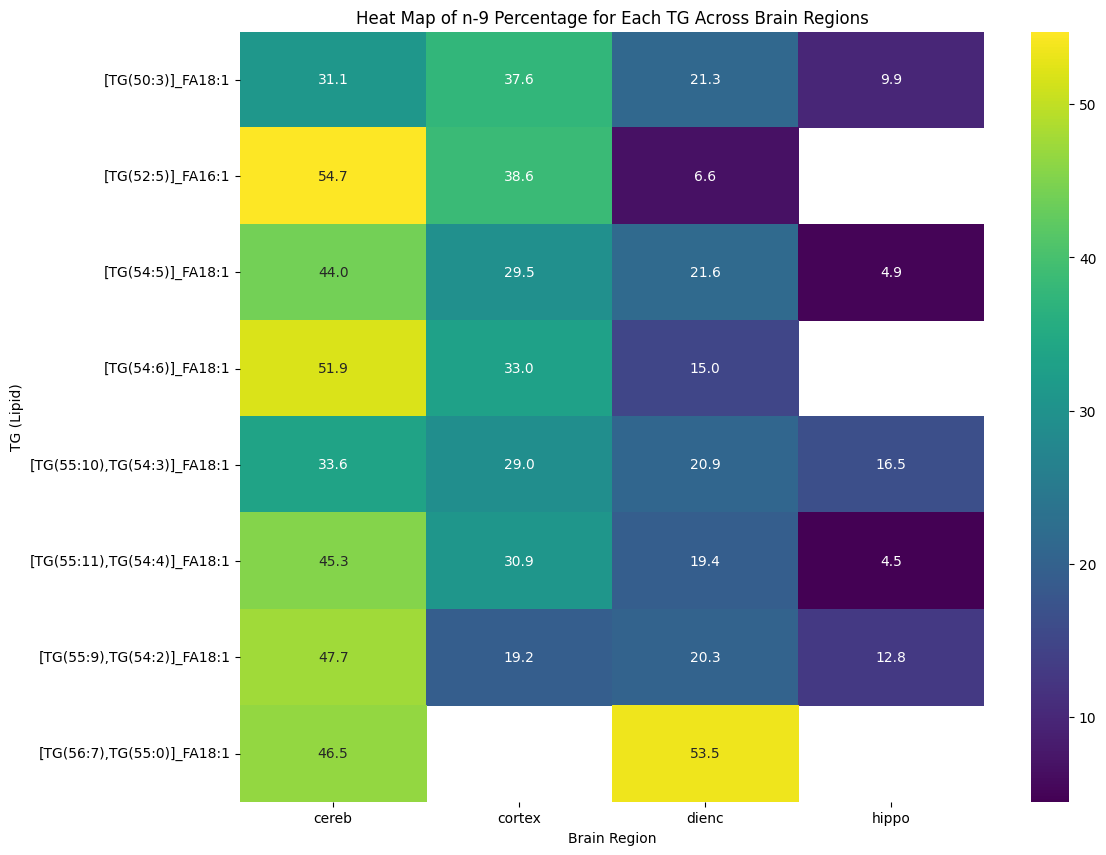

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'brain_df' is already defined and contains the necessary data
# Filtering data for 'n-9' db_pos across all brain regions
n9_data_all_regions = brain_df[brain_df['db_pos'] == 'n-9']

# Group by Lipid and Biology (brain region), summing OzESI_Intensity
grouped_n9_all_regions = n9_data_all_regions.groupby(['Lipid', 'Biology'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid in each brain region
grouped_n9_all_regions['Total_Intensity'] = grouped_n9_all_regions.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of 'n-9' for each lipid across brain regions
grouped_n9_all_regions['Relative_Percentage'] = (grouped_n9_all_regions['OzESI_Intensity'] / grouped_n9_all_regions['Total_Intensity']) * 100

# Pivoting for the heat map
pivot_n9_all_regions = grouped_n9_all_regions.pivot(index='Lipid', columns='Biology', values='Relative_Percentage')

# Creating the heat map for all brain regions
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_n9_all_regions, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG Across Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('Brain Region')
plt.show()


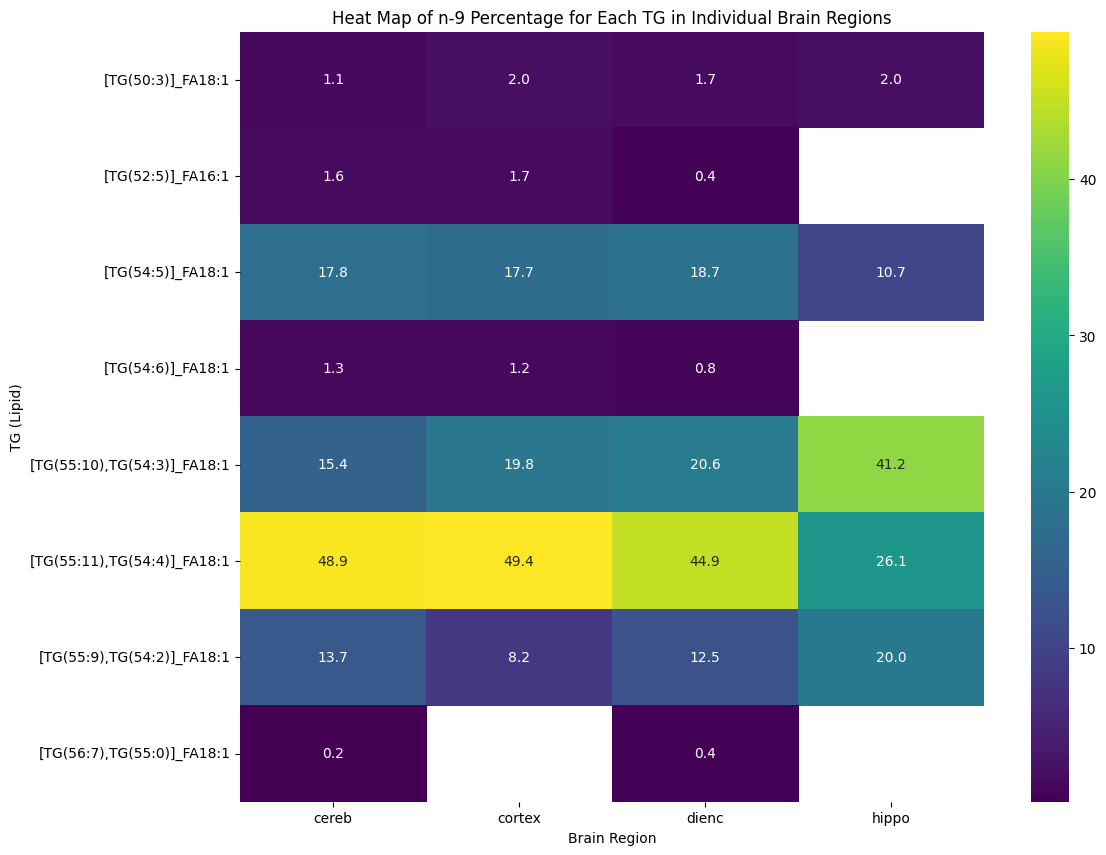

In [89]:
# Creating heatmaps for the relative percentage of 'n-9' for each lipid in individual brain regions
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'brain_df' is already defined and contains the necessary data
brain_regions = ['cortex', 'hippo', 'cereb', 'dienc']
combined_heatmap_data = pd.DataFrame()

for region in brain_regions:
    # Filter data for the current region and 'n-9' db_pos
    region_n9_data = brain_df[(brain_df['Biology'] == region) & (brain_df['db_pos'] == 'n-9')]

    # Group by Lipid, summing OzESI_Intensity
    grouped_region_n9 = region_n9_data.groupby('Lipid')['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid in the region
    grouped_region_n9['Total_Intensity'] = region_n9_data['OzESI_Intensity'].sum()  # Total intensity of n-9 in the region

    # Calculating the relative percentage of 'n-9' for each lipid in the region
    grouped_region_n9['Relative_Percentage'] = (grouped_region_n9['OzESI_Intensity'] / grouped_region_n9['Total_Intensity']) * 100

    # Adding region information and appending to combined data
    grouped_region_n9['Region'] = region
    combined_heatmap_data = combined_heatmap_data.append(grouped_region_n9)

# Pivoting combined data for the heatmap
pivot_combined_heatmap = combined_heatmap_data.pivot(index='Lipid', columns='Region', values='Relative_Percentage')

# Creating the combined heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_combined_heatmap, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG in Individual Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('Brain Region')
plt.show()


In [91]:
brain_df.to_csv('brain_df.csv')

In [ ]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [44]:
# # Creating a unique identifier combining 'Lipid' and 'Lipid_DB_group'
# liver_df['Lipid_Group_ID'] = liver_df['Lipid'] + '_Group_' + liver_df['Lipid_DB_group'].astype(str)


# # Group by this new identifier and db_pos, summing OzESI_Intensity
# grouped_intensity = liver_df.groupby(['Lipid_Group_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# # Pivot the DataFrame for plotting
# pivot_intensity = grouped_intensity.pivot(index='Lipid_Group_ID', columns='db_pos', values='OzESI_Intensity').fillna(0)

# # Plotting
# pivot_intensity.plot(kind='bar', stacked=True)
# plt.ylabel('Sum of OzESI_Intensity')
# plt.title('Sum of OzESI_Intensity for Each Lipid and Lipid_DB_group')
# plt.show()

In [46]:
# # First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
# grouped = liver_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()
# grouped = grouped.sort_values(by=['Sample_ID', 'db_pos', 'OzESI_Intensity'], ascending=[True, True, True])
# grouped
# # Next, we calculate the total intensity for each Sample_ID
# grouped['Total_Intensity'] = grouped.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# # Now we calculate the relative percentage of each db_pos
# grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# # Pivot for plotting
# pivot_table = grouped.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')
# pivot_table

# # Plotting all together
# pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
# plt.ylabel('Relative Percentage (%)')
# plt.title('Relative Percentage of OzESI Intensity by db_pos for each Sample_ID')
# plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


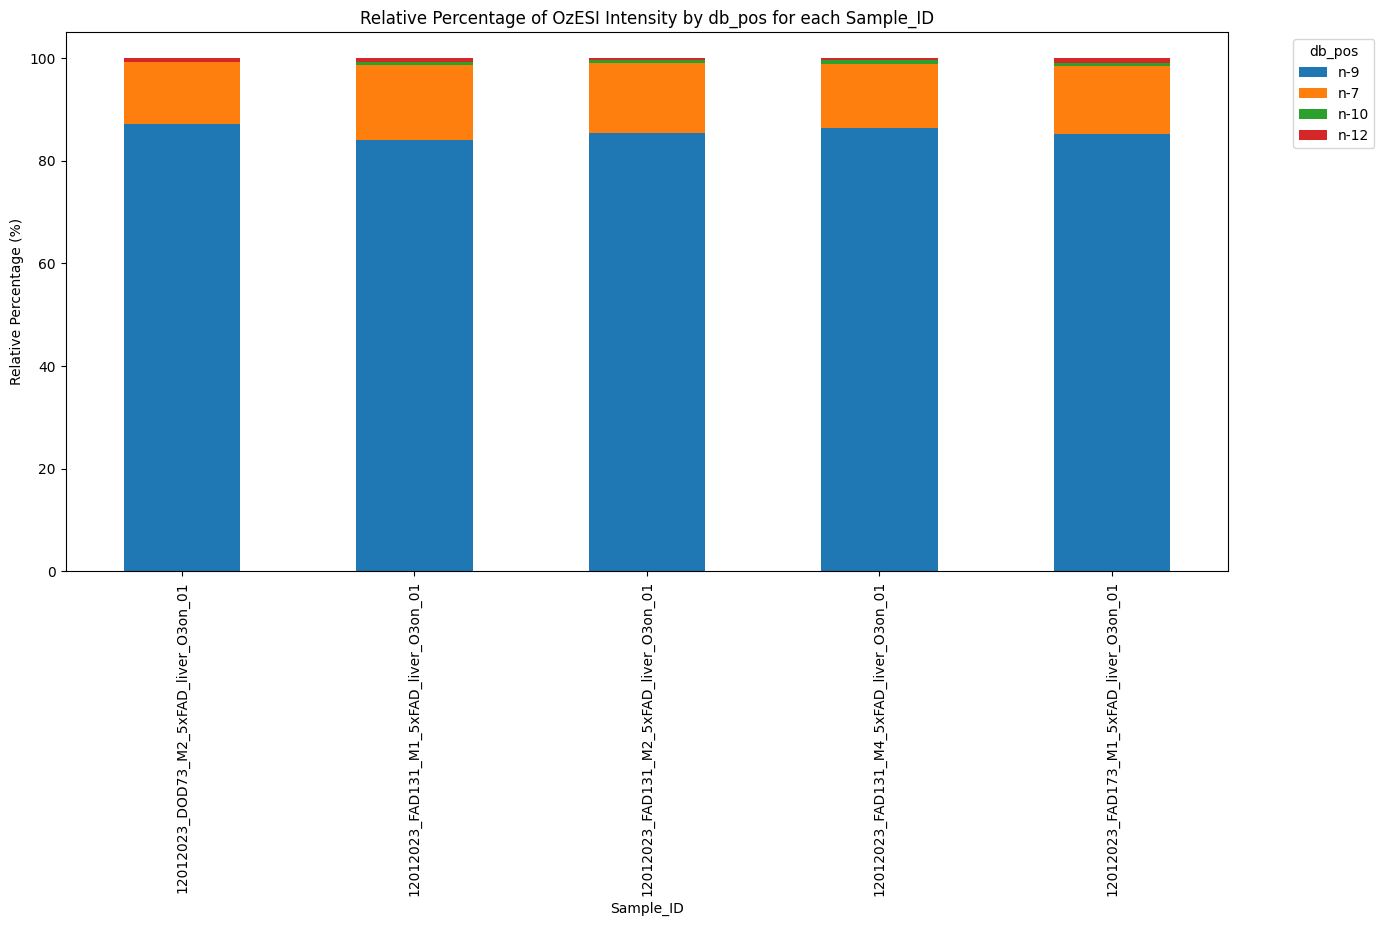

In [47]:
# Adjusting the code to ensure all 'db_pos' categories are present after pivoting

# First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
grouped = liver_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped['Total_Intensity'] = grouped.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table = grouped.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')

# Ensuring that all db_pos categories are present
all_db_pos = ['n-9', 'n-7', 'n-10', 'n-12']
pivot_table = pivot_table.reindex(all_db_pos, axis=1, fill_value=0)

# Ordering the db_pos categories as desired
pivot_table = pivot_table[all_db_pos]

# Plotting all together with the desired order of db_pos
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for each Sample_ID')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


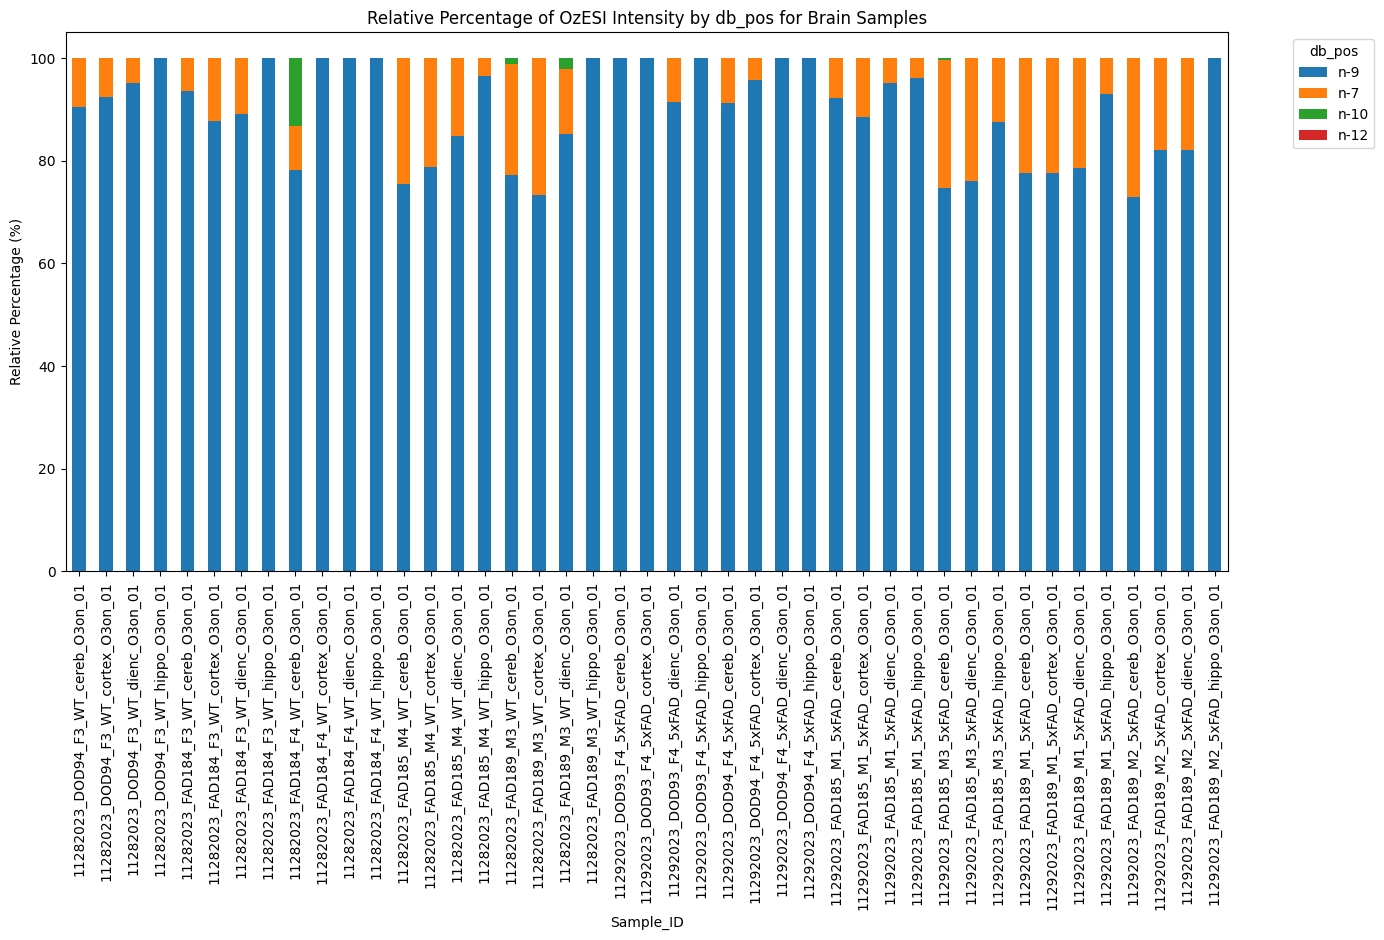

In [48]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Brain plot good

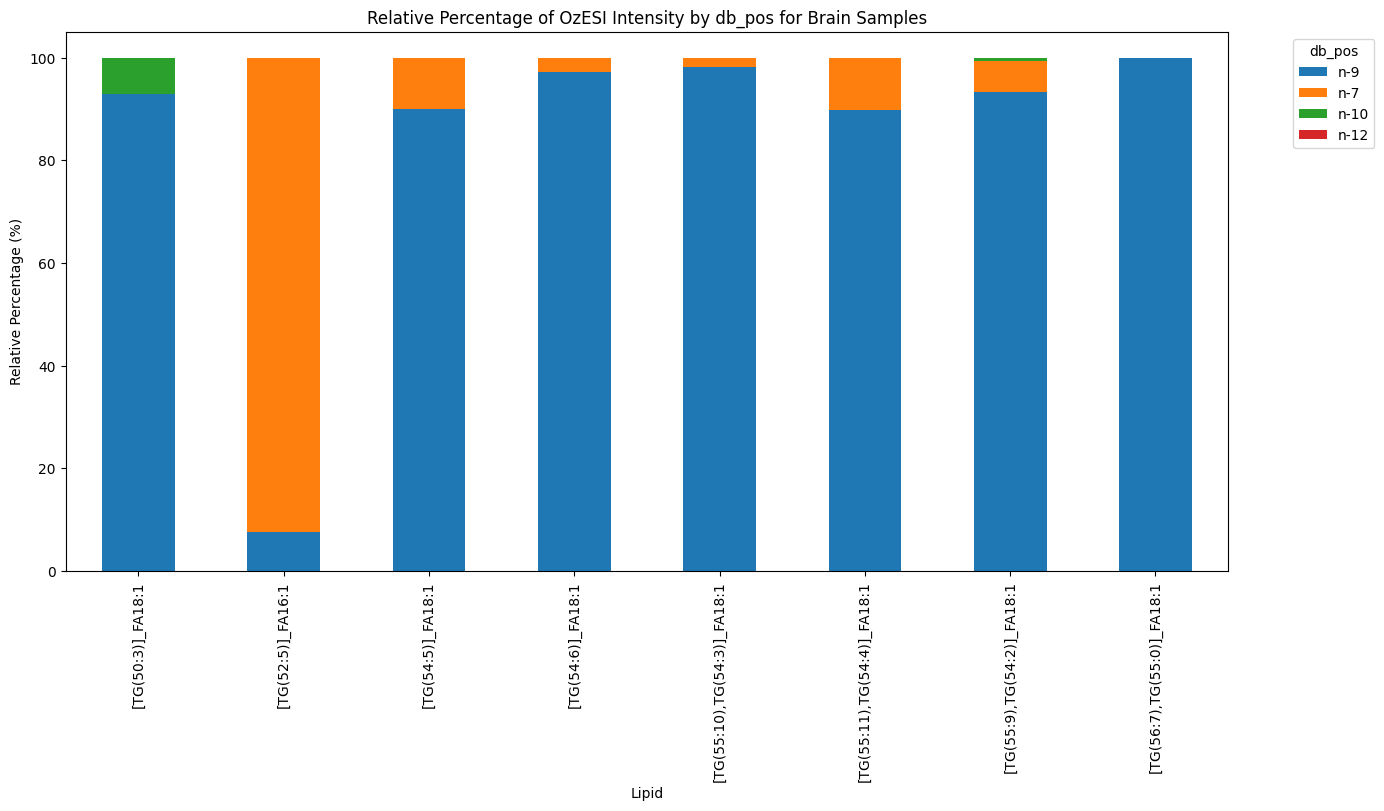

In [51]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

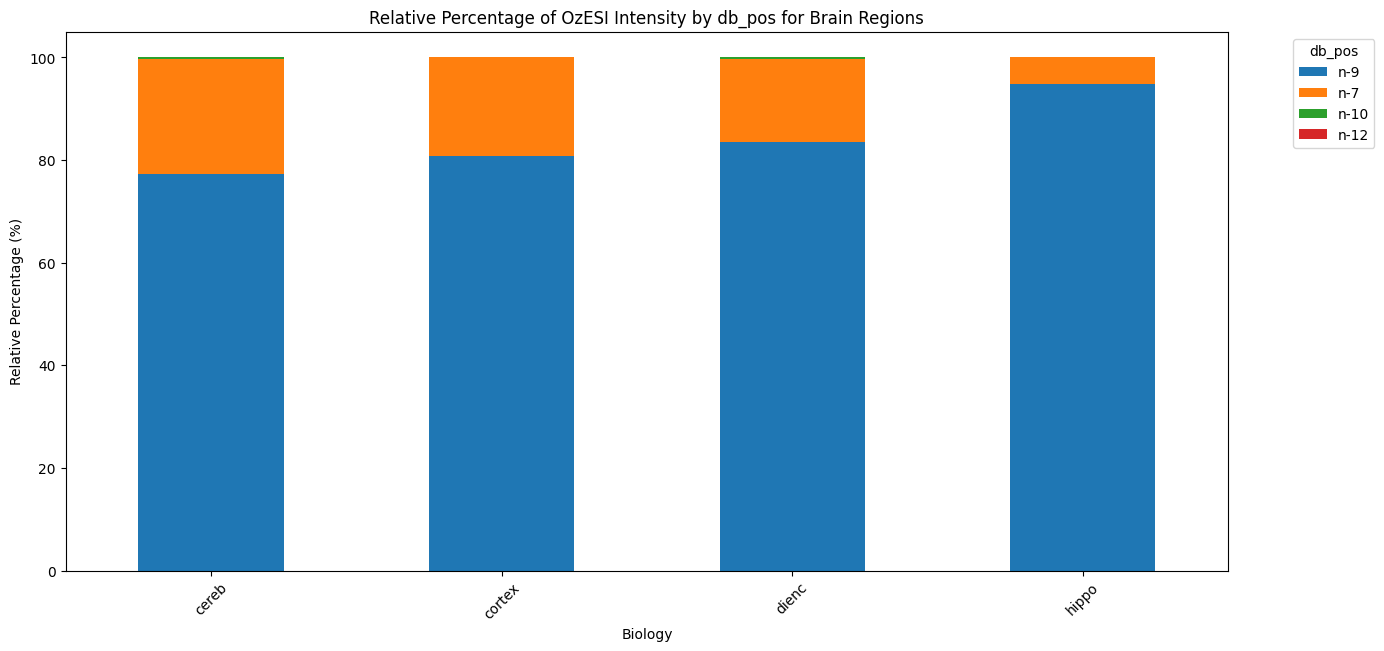

In [49]:
# Filter the DataFrame for the brain biology values
brain_regions = ['cortex', 'cereb', 'hippo', 'dienc']
brain_df = df[df['Biology'].isin(brain_regions)]

# Group by Biology (brain region), db_pos, summing OzESI_Intensity, and calculate relative percentages
grouped_brain = (
    brain_df.groupby(['Biology', 'db_pos'])['OzESI_Intensity']
    .sum()
    .groupby(level=0)
    .transform(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Biology', columns='db_pos', values='OzESI_Intensity')
pivot_table_brain = pivot_table_brain.reindex(columns=['n-9', 'n-7', 'n-10', 'n-12'], fill_value=0)

# Plotting with the brain regions on the x-axis
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Regions')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

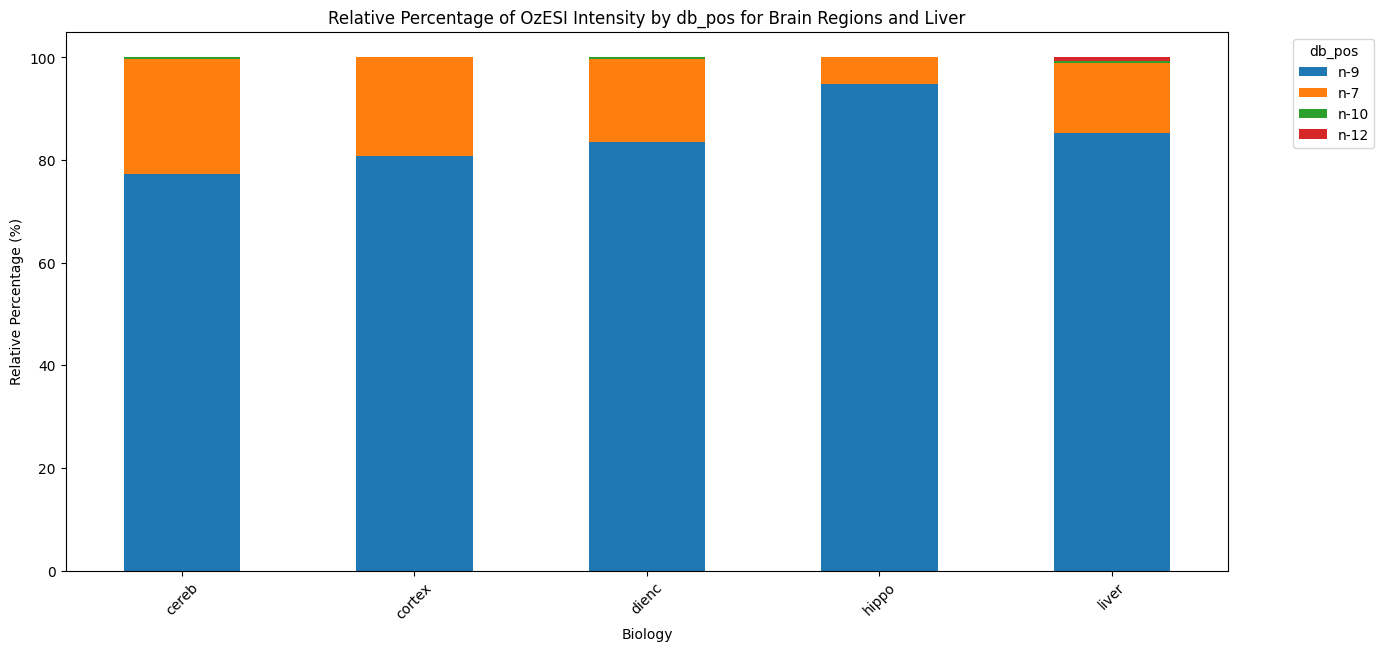

In [50]:
# First, let's create the liver data bar similar to how we did for the brain regions
liver_data = df[df['Biology'] == 'liver']

# Group by Biology (liver), db_pos, summing OzESI_Intensity, and calculate relative percentages
grouped_liver = (
    liver_data.groupby(['Biology', 'db_pos'])['OzESI_Intensity']
    .sum()
    .groupby(level=0)
    .transform(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_liver = grouped_liver.pivot(index='Biology', columns='db_pos', values='OzESI_Intensity')
pivot_table_liver = pivot_table_liver.reindex(columns=['n-9', 'n-7', 'n-10', 'n-12'], fill_value=0)

# Now combine the brain and liver data
combined_pivot_table = pd.concat([pivot_table_brain, pivot_table_liver])

# Plotting with the brain regions and liver data on the x-axis
combined_pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Regions and Liver')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
